In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
! unzip /content/gdrive/MyDrive/PROJECT/archive.zip -d /content/gdrive/MyDrive/PROJECT/

Streaming output truncated to the last 5000 lines.
  inflating: /content/gdrive/MyDrive/PROJECT/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0001.png  
  inflating: /content/gdrive/MyDrive/PROJECT/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0002.png  
  inflating: /content/gdrive/MyDrive/PROJECT/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0003.png  
  inflating: /content/gdrive/MyDrive/PROJECT/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0004.png  
  inflating: /content/gdrive/MyDrive/PROJECT/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0005.png  
  inflating: /content/gdrive/MyDrive/PROJECT/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0006.png  
  inflating: /content/gdrive/MyDrive/PROJECT/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0007.png  
  inflating: /content/gdrive/MyDrive/PROJECT/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0008.png  
  inflating: /content/gdrive/MyDrive/PROJECT/leapgestrecog/leapGestRecog/07/06_index/

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/content/gdrive/MyDrive/PROJECT'):
    for filename in filenames:
        os.path.join(dirname, filename)

import warnings
warnings.filterwarnings('ignore')

import keras
import matplotlib.pyplot as plt # for plotting
import os # provides a way of using operating system dependent functionality
import cv2 #Image handling library
import numpy as np

# Import of keras model and hidden layers for our convolutional network
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

In [22]:
import tensorflow as tf

In [14]:
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50

# paths for dataset
data_path = "/content/gdrive/MyDrive/PROJECT/leapgestrecog/leapGestRecog"

# Data



In [15]:
# Loading the images and their class(0 - 9)
image_data = []
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass
image_data[0]

[array([[5, 4, 4, ..., 3, 4, 2],
        [5, 4, 5, ..., 3, 3, 3],
        [4, 5, 4, ..., 4, 5, 3],
        ...,
        [4, 5, 5, ..., 5, 5, 5],
        [5, 5, 6, ..., 5, 7, 4],
        [4, 7, 5, ..., 5, 4, 4]], dtype=uint8), 0]

In [16]:
# shuffle the input data
import random
random.shuffle(image_data)

In [17]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)

label[:10]

[0, 9, 6, 6, 0, 5, 4, 4, 9, 3]

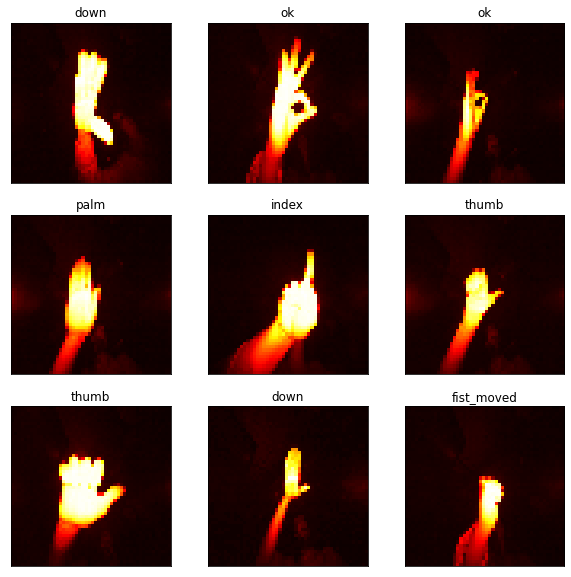

In [18]:
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
plt.show()

In [19]:
# Normalizing the data
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20000, 50, 50)

In [23]:
# one hot encoding
label = tf.keras.utils.to_categorical(label, num_classes=10,dtype='i1')
label[0]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

In [24]:
# reshaping the data
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

In [55]:
# splitting the input_data to train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.2, random_state=0)

# Model

In [56]:
model = keras.models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))


model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [29]:
# model.fit(X_train, y_train, epochs = 10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
500/500 [==============================] - 131s 260ms/step - loss: 0.2979 - accuracy: 0.9032 - val_loss: 0.0611 - val_accuracy: 0.9850
Epoch 2/10
500/500 [==============================] - 134s 268ms/step - loss: 0.0161 - accuracy: 0.9952 - val_loss: 0.0073 - val_accuracy: 0.9977
Epoch 3/10
500/500 [==============================] - 134s 268ms/step - loss: 0.0105 - accuracy: 0.9975 - val_loss: 0.0010 - val_accuracy: 0.9995
Epoch 4/10
500/500 [==============================] - 130s 261ms/step - loss: 0.0060 - accuracy: 0.9979 - val_loss: 7.8999e-04 - val_accuracy: 0.9998
Epoch 5/10
500/500 [==============================] - 130s 260ms/step - loss: 0.0028 - accuracy: 0.9990 - val_loss: 2.7829e-05 - val_accuracy: 1.0000
Epoch 6/10
500/500 [==============================] - 135s 270ms/step - loss: 0.0026 - accuracy: 0.9992 - val_loss: 4.2034e-05 - val_accuracy: 1.0000
Epoch 7/10
500/500 [==============================] - 131s 262ms/step - loss: 0.0041 - accuracy: 0.9994 - val_lo

In [30]:
# model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 46, 46, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 32)        0         
                                                        

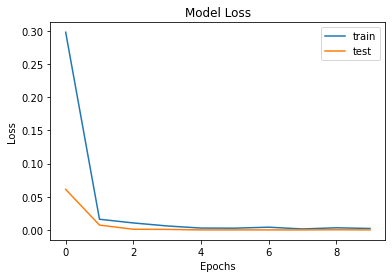

In [31]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

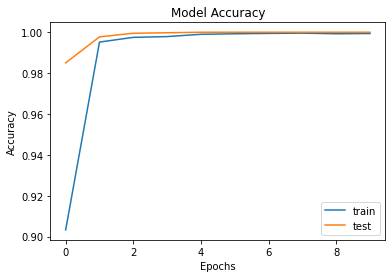

In [32]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [50]:
#calculate loss and accuracy on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

KeyboardInterrupt: ignored

Model accuracy is at 100%, which is bad because this will cause overfitting. 

In [58]:
checkpoint_path = "/content/gdrive/MyDrive/PROJECT/training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model with the new callback
model.fit(X_train, y_train, epochs = 1, batch_size=32, validation_data=(X_test, y_test), callbacks=[cp_callback])

# Loads the weights
# model.load_weights(checkpoint_path)

500/500 [==============================] - ETA: 0s - loss: 0.3048 - accuracy: 0.9012
Epoch 00001: saving model to /content/gdrive/MyDrive/PROJECT/training_1/cp.ckpt
500/500 [==============================] - 143s 270ms/step - loss: 0.3048 - accuracy: 0.9012 - val_loss: 0.0110 - val_accuracy: 0.9977


In [59]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 activation_12 (Activation)  (None, 48, 48, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 46, 46, 32)        9248      
                                                                 
 activation_13 (Activation)  (None, 46, 46, 32)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 23, 23, 32)        0         
                                                      

In [60]:
#calculate loss and accuracy on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

125/125 [==============================] - 8s 61ms/step - loss: 0.0110 - accuracy: 0.9977
Test accuracy: 99.77%


# Save Model

In [46]:
!pip install pyyaml h5py  # Required to save models in HDF5 format

In [62]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
!mkdir -p /content/gdrive/MyDrive/PROJECT/saved_model
model.save('/content/gdrive/MyDrive/PROJECT/saved_model/my_model.h5') 

In [64]:
new_model = tf.keras.models.load_model('/content/gdrive/MyDrive/PROJECT/saved_model/my_model.h5')

# Check its architecture
new_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 activation_12 (Activation)  (None, 48, 48, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 46, 46, 32)        9248      
                                                                 
 activation_13 (Activation)  (None, 46, 46, 32)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 23, 23, 32)        0         
                                                      

In [65]:
#calculate loss and accuracy on test data
test_loss, test_accuracy = new_model.evaluate(X_test, y_test)
print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

125/125 [==============================] - 8s 61ms/step - loss: 0.0110 - accuracy: 0.9977
Test accuracy: 99.77%
